In [1]:
from astropy.table import Table
import numpy
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransform

In [2]:
data = Table.read('data_PAH&AGN&shock_removed.fits')
PAH1 = Table.read('PAH_1.fits')
PAH2 = Table.read('PAH_2.fits')
AGN = Table.read('AGN.fits')
shock = Table.read('shock.fits')

In [3]:
sigma1 = numpy.sqrt(numpy.square(data['d4_5m'])+numpy.square(data['d5_8m']))
sigma2 = numpy.sqrt(numpy.square(data['d3_6m'])+numpy.square(data['d4_5m']))

x = data['mag4_5']-data['mag5_8']
y = data['mag3_6']-data['mag4_5']
PAHcon_index = []

for i in range(0,len(data)):
    if (y[i] - sigma2[i] <= (x[i] + sigma1[i] - 0.7)*1.4 + 0.15):
        if y[i] - sigma2[i] <= 1.65:
            if data['d3_6m'][i]<0.2:
                if data['d4_5m'][i]<0.2:
                    if data['d5_8m'][i]<0.2:
                        if data['d8_0m'][i]<0.2:
                            PAHcon_index.append(i)

In [4]:
data[PAHcon_index].write('PAHcon.fits')
print(len(PAHcon_index))

470600


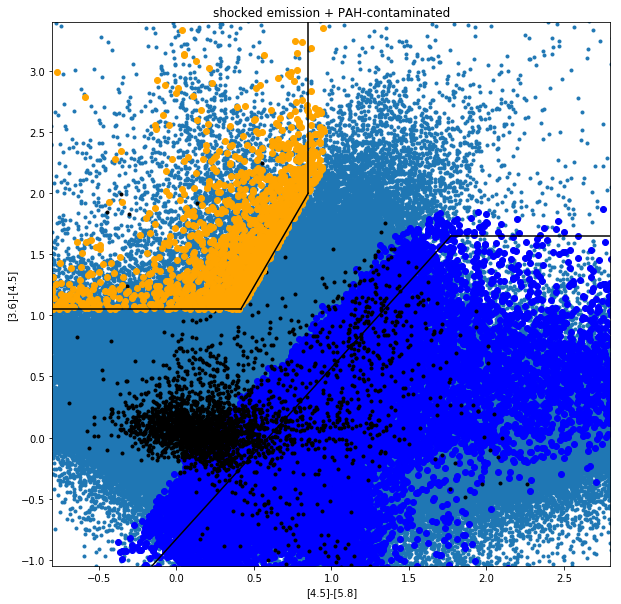

In [5]:
plt.figure(figsize=(10,10))

plt.scatter(x,y,marker = '.',)
plt.scatter(x[PAHcon_index],y[PAHcon_index],color='b')

plt.scatter(PAH1['mag4_5']-PAH1['mag5_8'],PAH1['mag3_6']-PAH1['mag4_5'],color='black',marker='.')
plt.scatter(PAH2['mag4_5']-PAH2['mag5_8'],PAH2['mag3_6']-PAH2['mag4_5'],color='black',marker='.')
plt.scatter(AGN['mag4_5']-AGN['mag5_8'],AGN['mag3_6']-AGN['mag4_5'],color='black',marker='.')
plt.scatter(shock['mag4_5']-shock['mag5_8'],shock['mag3_6']-shock['mag4_5'],color='orange',marker='o')
plt.plot([-4.5, 0.415], [1.05, 1.05], color = 'black') 
plt.plot([0.85,0.85],[4,2] , color = 'black') #[5.8] − [8.0] > 1
plt.plot([0.415,0.85],[1.05,2], color = 'black')

plt.plot([1.77,6],[1.65,1.65], color = 'black')
plt.plot([-0.3,1.77],[-1.25,1.65], color = 'black')
plt.xlabel('[4.5]-[5.8]')
plt.ylabel('[3.6]-[4.5]')
plt.xlim(-0.8, 2.8)
plt.ylim(-1.05,3.4)
plt.title('shocked emission + PAH-contaminated')

data.remove_rows(PAHcon_index)
data.write('data_PAH&ANG&shock&PAHcon_removed.fits')